# Project: Investigate a Tmdb-Movies dataset

The primary goal of the project is to go through the dataset and the general data analysis process using numpy,pandas and matplotlib libraries. 


## Table of Contents:

- Introduction
- Data Wrangling
- Exploratory Data Analysis
- Conclusions


# Introduction 
I choose the tmdb movies dataset to analyze. This dataset contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue,cast,release year and other columns we will working on

# Research Questions for investigations 
- Which top 10 movies have the highest popularity ?
- Which year have the highest release of movies?
- what are the most popular genre ?
- does the duration of movies affect on the popularity ?


In [1]:
# import all packages that is needed 

import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline

# Data Wrangling 

Data wrangling is a process of cleans the messy and duplicated data, also gathering data. all these make it easier for accessing and analysis.

### **Data wrangling Phases are :**
- Gathering & Accessing data : important step to gain a better understanding for Identify/obtain accessing to the data.
- Data cleansinng : assuring the overall quality of the data by redesigning data into a accurate, actionable data in the hands.

### Data Accessing  
``` Read the dataset ```
``` Check the datatype of each columns ```
``` Check the number of samples```

In [2]:
# load data & print a few lines
df = pd.read_csv('tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/2015,5562,6.5,2015,137999939.3,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/2015,6185,7.1,2015,137999939.3,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/2015,2480,6.3,2015,101199955.5,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/2015,5292,7.5,2015,183999919.0,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/2015,2947,7.3,2015,174799923.1,1.385749e+09


In [3]:
# print datatypes of the dataset :
df.dtypes

id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

In [4]:
# check the number of samples&columns of the dataset :
df.shape

(10866, 21)

### Data Cleaning 
```check the duplicated rows``` 
```missing values ```
``` unique values ```

In [5]:
# check for duplicates : 
sum(df.duplicated())

1

In [6]:
# Drop duplicated data if any:
df.drop_duplicates(inplace=True)
print('After removing the duplicated values :',df.shape)

After removing the duplicated values : (10865, 21)


In [7]:
# check the data types and convert the formats 
df['release_date']=pd.to_datetime(df['release_date'])
df.dtypes
df['release_date'].head()

0   2015-06-09
1   2015-05-13
2   2015-03-18
3   2015-12-15
4   2015-04-01
Name: release_date, dtype: datetime64[ns]


- The release_date column values need to be converted to real date values **TO-FIX** list.
convert release_date to YYYY-MM-DD


In [8]:
# check null values and delete if any 
list(df.isnull().sum().items())

[('id', 0),
 ('imdb_id', 10),
 ('popularity', 0),
 ('budget', 0),
 ('revenue', 0),
 ('original_title', 0),
 ('cast', 76),
 ('homepage', 7929),
 ('director', 44),
 ('tagline', 2824),
 ('keywords', 1493),
 ('overview', 4),
 ('runtime', 0),
 ('genres', 23),
 ('production_companies', 1030),
 ('release_date', 0),
 ('vote_count', 0),
 ('vote_average', 0),
 ('release_year', 0),
 ('budget_adj', 0),
 ('revenue_adj', 0)]

**We notice that there are missing values in the dataset so it's good to remove it:**
- because of the imdb_id columns it's a generated system numbers I'll keep it..
- Homepage,tagline and production companies, overview columns have a lot of missing values, I decided to delete it since they have a lot of null values.

In [9]:
# drop unused columns 
df.drop(['homepage','tagline','production_companies','budget_adj','revenue_adj','overview'],axis=1 ,inplace = True)

In [10]:
# for removing NAN values of genres column and filling the other by 0 
df=df[df['genres'].isnull()== False]
df.fillna(0,inplace=True)

In [11]:
# check unique value counts of all columns
df.nunique()

id                10842
imdb_id           10835
popularity        10791
budget              557
revenue            4702
original_title    10548
cast              10698
director           5057
keywords           8802
runtime             246
genres             2039
release_date       5904
vote_count         1289
vote_average         72
release_year         56
dtype: int64

In [12]:
print('Number of records of revenue = 0 are ',df[df['revenue']==0]['id'].count())
print('Number of records of budget = 0 are ',df[df['budget']==0]['id'].count())

Number of records of revenue = 0 are  5993
Number of records of budget = 0 are  5674


- There're 0's value in the budget , runtime and revenue it doesn't make sense which affect on the results. We can't delete this huge number of records so it's better to deal with them. which also we need to deal with runtime.

In [13]:
#  so the way to make it sense replace it with the mean 
df['budget']=df['budget'].replace(0,df['budget'].mean())
df['revenue']=df['revenue'].replace(0,df['revenue'].mean())
df['runtime']=df['runtime'].replace(0,df['runtime'].mean())

In [14]:
# Check the discriptive statistic og the dataset
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year
count,10842.000000,10842.000000,1.084200e+04,1.084200e+04,10842.000000,10842.000000,10842.000000,10842.000000
mean,65870.675521,0.647461,2.232495e+07,6.197271e+07,102.421062,217.823649,5.974064,2001.314794
std,91981.355752,1.001032,2.803615e+07,1.111273e+08,30.828622,576.180993,0.934257,12.813617
min,5.000000,0.000065,1.000000e+00,2.000000e+00,2.000000,10.000000,1.500000,1960.000000
25%,10589.250000,0.208210,1.465531e+07,3.991138e+07,90.000000,17.000000,5.400000,1995.000000
50%,20557.000000,0.384532,1.465531e+07,3.991138e+07,99.000000,38.000000,6.000000,2006.000000
75%,75186.000000,0.715393,1.500000e+07,3.991138e+07,111.000000,146.000000,6.600000,2011.000000
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000


## Exploratory Data Analysis (EDA)


array([[<AxesSubplot:title={'center':'id'}>,
        <AxesSubplot:title={'center':'popularity'}>,
        <AxesSubplot:title={'center':'budget'}>],
       [<AxesSubplot:title={'center':'revenue'}>,
        <AxesSubplot:title={'center':'runtime'}>,
        <AxesSubplot:title={'center':'vote_count'}>],
       [<AxesSubplot:title={'center':'vote_average'}>,
        <AxesSubplot:title={'center':'release_year'}>, <AxesSubplot:>]],
      dtype=object)

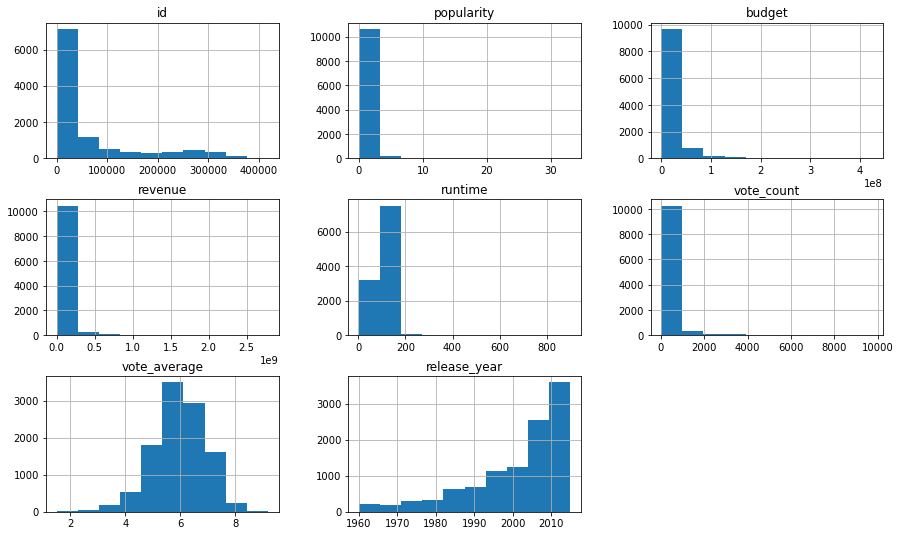

In [15]:
# Explore the histogram of data 
df.hist(figsize=(15,9))

## What are the top 10 movies have the highest popularity ?

In [16]:
top_movies = df.nlargest(10,'popularity')
top_movies

,id,imdb_id,popularity,budget,revenue,original_title,cast,director,keywords,runtime,genres,release_date,vote_count,vote_average,release_year
0,135397,tt0369610,32.985763,150000000.0,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124.0,Action|Adventure|Science Fiction|Thriller,2015-06-09,5562,6.5,2015
1,76341,tt1392190,28.419936,150000000.0,3.784364e+08,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,future|chase|post-apocalyptic|dystopia|australia,120.0,Action|Adventure|Science Fiction|Thriller,2015-05-13,6185,7.1,2015
629,157336,tt0816692,24.949134,165000000.0,6.217525e+08,Interstellar,Matthew McConaughey|Jessica Chastain|Anne Hath...,Christopher Nolan,saving the world|artificial intelligence|fathe...,169.0,Adventure|Drama|Science Fiction,2014-11-05,6498,8.0,2014
630,118340,tt2015381,14.311205,170000000.0,7.733124e+08,Guardians of the Galaxy,Chris Pratt|Zoe Saldana|Dave Bautista|Vin Dies...,James Gunn,marvel comic|spaceship|space|scene during end ...,121.0,Action|Science Fiction|Adventure,2014-07-30,5612,7.9,2014
2,262500,tt2908446,13.112507,110000000.0,2.952382e+08,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,based on novel|revolution|dystopia|sequel|dyst...,119.0,Adventure|Science Fiction|Thriller,2015-03-18,2480,6.3,2015
631,100402,tt1843866,12.971027,170000000.0,7.147666e+08,Captain America: The Winter Soldier,Chris Evans|Scarlett Johansson|Sebastian Stan|...,Joe Russo|Anthony Russo,washington d.c.|future|shield|marvel comic|comic,136.0,Action|Adventure|Science Fiction,2014-03-20,3848,7.6,2014
1329,11,tt0076759,12.037933,11000000.0,7.753980e+08,Star Wars,Mark Hamill|Harrison Ford|Carrie Fisher|Peter ...,George Lucas,android|galaxy|hermit|death star|lightsaber,121.0,Adventure|Action|Science Fiction,1977-03-20,4428,7.9,1977
632,245891,tt2911666,11.422751,20000000.0,7.873990e+07,John Wick,Keanu Reeves|Michael Nyqvist|Alfie Allen|Wille...,Chad Stahelski|David Leitch,hitman|revenge|murder|gangster|dog,101.0,Action|Thriller,2014-10-22,2712,7.0,2014
3,140607,tt2488496,11.173104,200000000.0,2.068178e+09,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,android|spaceship|jedi|space opera|3d,136.0,Action|Adventure|Science Fiction|Fantasy,2015-12-15,5292,7.5,2015
633,131631,tt1951265,10.739009,125000000.0,7.521002e+08,The Hunger Games: Mockingjay - Part 1,Jennifer Lawrence|Josh Hutcherson|Liam Hemswor...,Francis Lawrence,resistance|post-apocalyptic|dystopia|war|sequel,123.0,Science Fiction|Adventure|Thriller,2014-11-18,3590,6.6,2014


Text(0.5, 0, 'popuality')

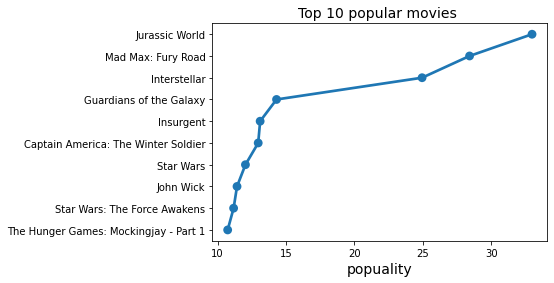

In [17]:
top_mov=pd.DataFrame(df['popularity'].sort_values(ascending=False))
top_mov['original_title']=df['original_title']
data=list(top_mov['original_title'])
x=list(data[:10])
y=list(top_mov['popularity'][:10])
ax=sb.pointplot(x=y,y=x)
ax.set_title('Top 10 popular movies ',fontsize=14)
ax.set_xlabel('popuality',fontsize=14)

- From this chart, we can see the top 10 highest popular movies which means that have a lot of watchers

# Which year have the highest release of movies?

In [18]:
# to extract the top 10 years have a large number of realese 
df['release_year'].value_counts().nlargest(10).sort_values(ascending=False)

2014    699
2013    656
2015    627
2012    584
2011    540
2009    531
2008    495
2010    487
2007    438
2006    408
Name: release_year, dtype: int64

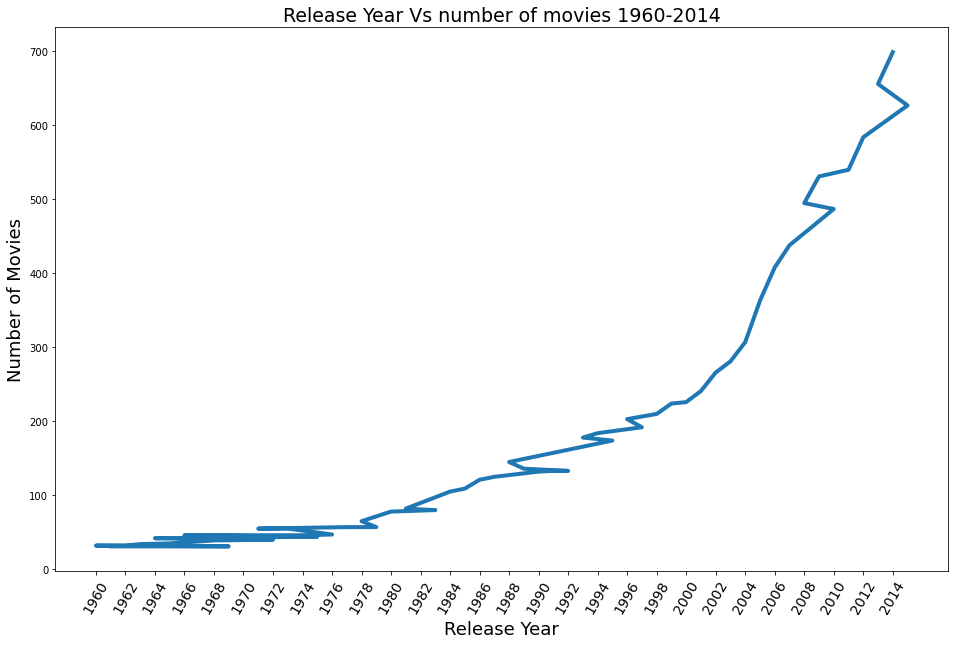

In [19]:
# Which year have the highest release of movies?
df['release_year'].value_counts()

fig = plt.figure(figsize=(16,10))
plt.plot(df['release_year'].value_counts(), linewidth=4)
plt.xticks(np.arange(1960,2015,2),fontsize=14,rotation = 60);
plt.title('Release Year Vs number of movies 1960-2014',fontsize=19)
plt.xlabel('Release Year', fontsize=18);
plt.ylabel('Number of Movies',fontsize=18);

- The number of movies shows increasing every year.
- From this chart, we can see that movies recorded the haighest realese in 2014 wheras the lowest number recorded shown in 60's.

## What are the top genres that become more popular than others ?

In [20]:
# As we can see, genres separated by '|' character so, I've decided to seperate them using split function 
def seperate(x):
    data=df[x].str.cat(sep='|')
    data=pd.Series(data.split('|'))
    count=data.value_counts(ascending=False)
    plt.figure(figsize = (16,10));
    count.plot(kind='bar')
    plt.xticks(fontsize=14 ,rotation = 90)
    plt.title('Highest popularity of genres of movies', fontsize=14)
    plt.xlabel('Genres',fontsize=14)
    plt.ylabel('popularity',fontsize=14)
    data=df[x].str.cat(sep='|')
    data=pd.Series(data.split('|'))
    count=data.value_counts(ascending=False)
    plt.figure(figsize = (16,10));
    count.plot(kind='pie')
    plt.xticks(fontsize=14 ,rotation = 90)
    plt.title('Highest popularity of genres of movies', fontsize=14)

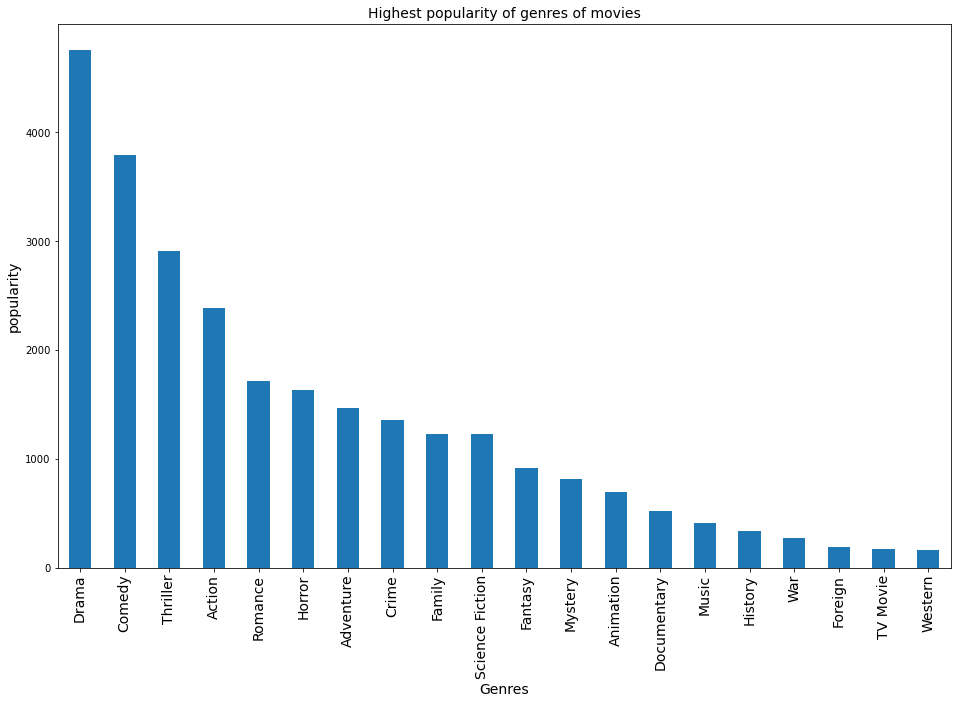

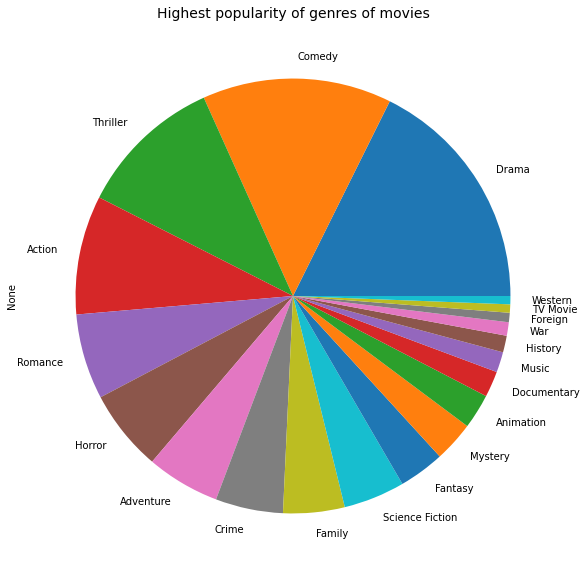

In [21]:
seperate('genres')

- As shown, we recorded the most popular genres,  and the top of them are Dramatic, comedy ,thriller and action movies . where  the lowest popularity of genres of movies  are War, Foreign ,Tv movie and Western.


# Does the runtime affect on the popularity ?

In [22]:
Duration=df.sort_values(by=['runtime'])
runtime=Duration['runtime']
popularity=Duration['popularity']

<function matplotlib.pyplot.show(close=None, block=None)>

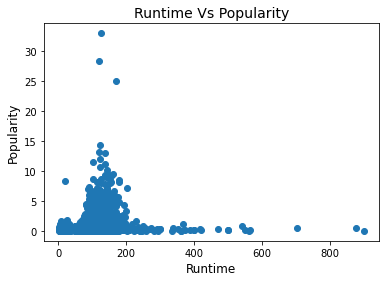

In [23]:
plt.scatter(runtime,popularity)
plt.title('Runtime Vs Popularity', fontsize=14)
plt.xlabel('Runtime', fontsize=12)
plt.ylabel('Popularity', fontsize=12)
plt.show

Text(0, 0.5, 'Runtime')

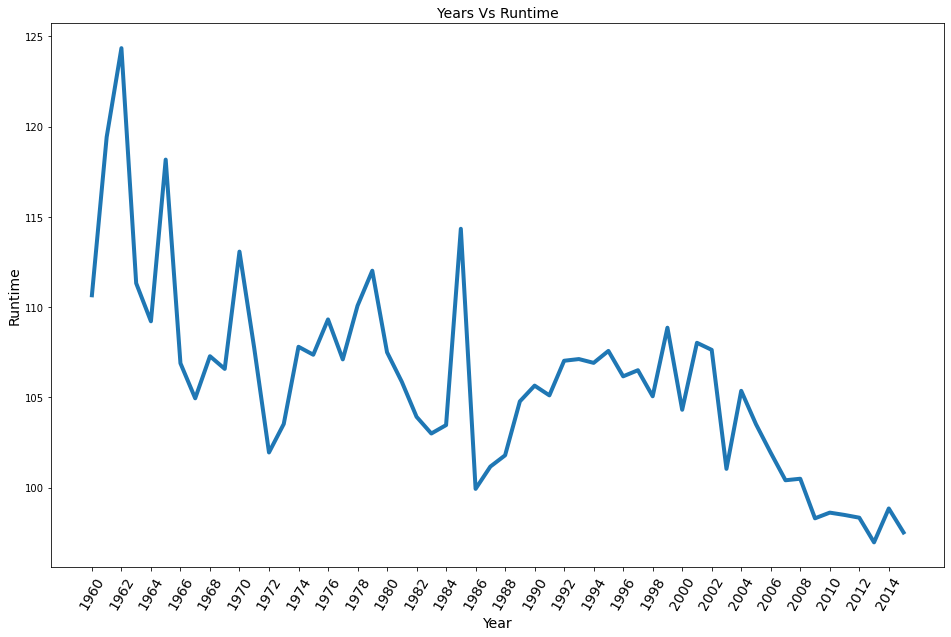

In [24]:
# Is the runtime differ from year-year !
#df.groupby('release_year').mean()['runtime'].plot(xticks=np.arange(1960,2015,3),rotation =90)
fig = plt.figure(figsize=(16,10))
plt.plot(df.groupby('release_year').mean()['runtime'], linewidth=4)
plt.xticks(np.arange(1960,2015,2),fontsize=14,rotation = 60)
plt.title('Years Vs Runtime',fontsize=14)
plt.xlabel('Year',fontsize=14)
plt.ylabel('Runtime',fontsize=14)


- the shortest duration of movies become more popular than longest duration, and we can recorde the decreasing of duration of movies over year to year.

## Correlations :


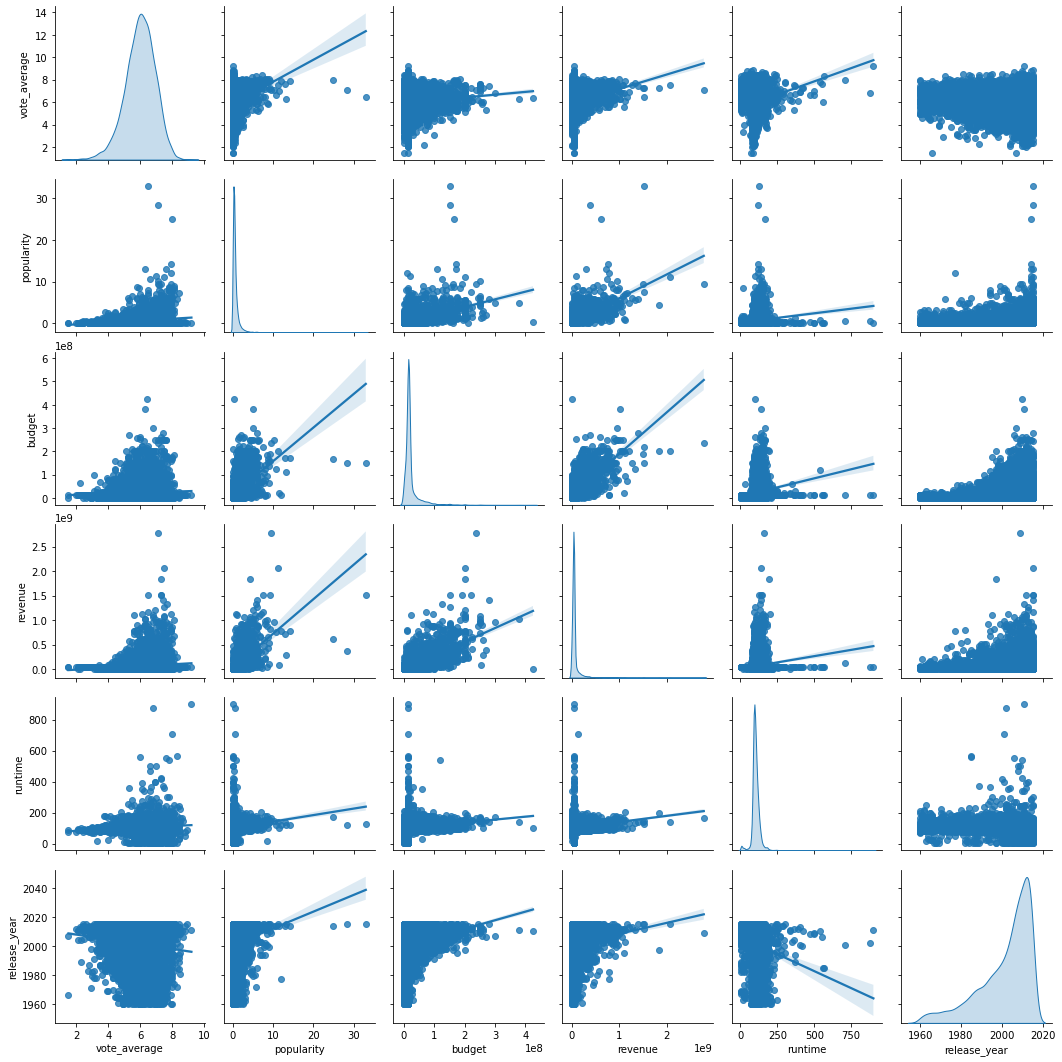

In [25]:
ax=df[['vote_average','popularity','budget','revenue','runtime','release_year']]
sb.pairplot(ax,kind='reg',diag_kind='kde',diag_kws=dict(shade=True))

- From this chart, we can see a lot of them has positive correlation .
- when we look to the runtime&release_year we can see the negative correlation between them, which we can consider the decreasing of runtime over year-year .
- Highest budget have a slight correlation with higher vote_average.
- revenue and budget have a positive correlation .

## Conclusion
```
I faced some limitation when I found more null values. budget and revenue have 0 values which influence on the results of the analysis and doesn't make sense.
It's not sufficient work on this dataset but we are now know that there're a lot of influential factor that would lead to diffrent results and there're many to take care of, to give people more expectation of the movies and get high revenue.
```
**Finally, The dataset rich in inforamtion which We investigated the correlation between some of the characteristics of the movies. We could summaries this result in the following points :**
- The beggining of the 60's, Filmmaking was increasing slowly until 2000.
- The highest number of filmmaking was in 2014.
- The most popular movies are Jurassic Worls,Mad Max, Interstellar.
- The most popular genres was filmed with Dramatic, Triler , comedy and action.
- There are a correlation between voting average and budget , which means
- when we look to the runtime&release_year we can see the negative correlation between them, which we can consider the increasing of run time over year-year which become more familiar than longest duration.
- Highest budget have a slight correlation with higher vote_average.
- revenue and budget have a positive correlation.

In [26]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

4294967295